# Story - 2 : Can the FED Control Inflation and Maintain Full Employment

The Federal Reserve's mandate from Congress is to control inflation and to maintain low unemployment. These seem to be contradictory objectives. For this story you will need to source the following data for the last 25 years:

- The Consumer Price Index (CPI) (Bureau of Labor Statistics)

- The FED Funds Rate (FRED) (Federal Reserve Board)

- Unemployment Rate  (Bureau of Labor Statistics)

Your Data Visualizations should be designed to answer the question "Has the FED been able to fulfill the mandate given to it by Congress?"

To control inflation and maintain low unemployment, the Federal Reserve (FED),  the central banking system in the United States, can alter federal funds rates. Raising rates makes it more expensive to borrow money, discouraging consumer spending, which can reduce inflation. This analysis will use CPI as a measure of inflation and unemployment rates over the past 25 years to show whether the FED has been able to fulfill its mandate.  

## Data Collection

In order to get the CPI and unemployment rate, I will use the Bureau of Labor Statistics public API (https://www.bls.gov/developers/home.htm). Luckily, there was a page that provided a sample code of how to receive the queries through their API. I modified the code so that it would save as a dataframe instead of a prettytable.

In [1]:
import requests
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# CPI
headers = {'Content-type': 'application/json'}

df = pd.DataFrame()

# It only allowed me to query 10 years at a time
data1 = json.dumps({"seriesid": ['CUUR0000SA0'], "startyear": "1999", "endyear": "2008"})
p1 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data1, headers=headers)
json_data1 = json.loads(p1.text)

data2 = json.dumps({"seriesid": ['CUUR0000SA0'], "startyear": "2009", "endyear": "2018"})
p2 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data2, headers=headers)
json_data2 = json.loads(p2.text)

data3 = json.dumps({"seriesid": ['CUUR0000SA0'], "startyear": "2019", "endyear": "2024"})
p3 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=data3, headers=headers)
json_data3 = json.loads(p3.text)

json_data_list = [json_data1, json_data2, json_data3]

for json_data in json_data_list:
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        rows = []
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes = ""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M12':
                rows.append([seriesId, year, period, value, footnotes[0:-1]])
        temp_df = pd.DataFrame(rows, columns=["series id", "year", "period", "value", "footnotes"])
        df = pd.concat([df, temp_df])

In [3]:
df.head()

,series id,year,period,value,footnotes
0,CUUR0000SA0,2008,M12,210.228,
1,CUUR0000SA0,2008,M11,212.425,
2,CUUR0000SA0,2008,M10,216.573,
3,CUUR0000SA0,2008,M09,218.783,
4,CUUR0000SA0,2008,M08,219.086,


In [4]:
headers = {'Content-type': 'application/json'}

unemployment = pd.DataFrame()

# It only allowed me to query 10 years at a time
une1 = json.dumps({"seriesid": ['LNS14000000'], "startyear": "1999", "endyear": "2008"})
a1 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=une1, headers=headers)
une1 = json.loads(a1.text)

une2 = json.dumps({"seriesid": ['LNS14000000'], "startyear": "2009", "endyear": "2018"})
a2 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=une2, headers=headers)
une2 = json.loads(a2.text)

une3 = json.dumps({"seriesid": ['LNS14000000'], "startyear": "2019", "endyear": "2024"})
a3 = requests.post('https://api.bls.gov/publicAPI/v2/timeseries/data/', data=une3, headers=headers)
une3 = json.loads(a3.text)

une_json_data_list = [une1, une2, une3]

for json_data in une_json_data_list:
    for series in json_data['Results']['series']:
        seriesId = series['seriesID']
        rows = []
        for item in series['data']:
            year = item['year']
            period = item['period']
            value = item['value']
            footnotes = ""
            for footnote in item['footnotes']:
                if footnote:
                    footnotes = footnotes + footnote['text'] + ','
            if 'M01' <= period <= 'M12':
                rows.append([seriesId, year, period, value, footnotes[0:-1]])
        une_temp_df = pd.DataFrame(rows, columns=["series id", "year", "period", "value", "footnotes"])
        unemployment = pd.concat([unemployment, une_temp_df])

In [5]:
unemployment.head()

,series id,year,period,value,footnotes
0,LNS14000000,2008,M12,7.3,
1,LNS14000000,2008,M11,6.8,
2,LNS14000000,2008,M10,6.5,
3,LNS14000000,2008,M09,6.1,
4,LNS14000000,2008,M08,6.1,


The Federal Fund rate data was gathered through the FRED API (https://fred.stlouisfed.org/series/FEDFUNDS).

In [6]:
api_key = '3339acd1bed557c627042001501f564c'
base_url = 'https://api.stlouisfed.org/fred/'
obs_endpoint = 'series/observations'
series_id = 'FEDFUNDS'
start_date = '1999-01-01'
end_date = '2024-01-31'
#ts_frequency = 'm'
obs_params ={
    'series_id': series_id,
    'api_key': api_key,
    'file_type': 'json',
    'observation_start': start_date,
    'observation_end': end_date
}
response = requests.get(base_url + obs_endpoint, params=obs_params)

if response.status_code == 200:
  res_data = response.json()
  obs_data = pd.DataFrame(res_data['observations'])
  obs_data['date'] = pd.to_datetime(obs_data['date'])
  obs_data['value'] = obs_data['value'].astype(float)
else:
  print(response.status_code)

## Cleaning the data

In [7]:
# Removing the M from the period column
df['period'] = df['period'].str[1:]

# Creating a date column with datetime
df['date'] = pd.to_datetime(df['year'].astype(str) + df['period'] + '01', format='%Y%m%d')

# Keeping the columns I want
df.rename(columns={'value': 'cpi'}, inplace=True)
df = df[['date', 'cpi']]

In [8]:
# Removing the M from the period column
unemployment['period'] = unemployment['period'].str[1:]

# Creating a date column with datetime
unemployment['date'] = pd.to_datetime(unemployment['year'].astype(str) + unemployment['period'] + '01', format='%Y%m%d')

# Keeping the columns I want
unemployment.rename(columns={'value': 'unemployment'}, inplace=True)
unemployment = unemployment[['date', 'unemployment']]

In [9]:
# Renaming and keeping the columns I want
obs_data.rename(columns= {'value': 'FRED'}, inplace=True)
obs_data = obs_data[['date','FRED']]

In [10]:
# Merging the dataframes by date
merged_df = df.merge(unemployment, on='date')
merged_df = merged_df.merge(obs_data, on='date')
merged_df['date'] = pd.to_datetime(merged_df['date'])
merged_df.set_index('date', inplace=True)
merged_df.sort_index(inplace=True)

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 301 entries, 1999-01-01 to 2024-01-01
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cpi           301 non-null    object 
 1   unemployment  301 non-null    object 
 2   FRED          301 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.4+ KB


In [12]:
merged_df = merged_df.astype(float)
merged_df.describe()

,cpi,unemployment,FRED
count,301.000000,301.000000,301.000000
mean,224.318362,5.695017,1.924020
std,36.344760,1.955695,2.017478
min,164.300000,3.400000,0.050000
25%,194.400000,4.200000,0.140000
50%,225.922000,5.100000,1.220000
75%,246.663000,6.400000,3.620000
max,308.417000,14.800000,6.540000


In [13]:
# Finding the highest unemployment rates
top_unemployment = merged_df.sort_values('unemployment', ascending=False).drop_duplicates('unemployment').head(10)
top_unemployment

,cpi,unemployment,FRED
date,,,
2020-04-01,256.389,14.8,0.05
2020-05-01,256.394,13.2,0.05
2020-06-01,257.797,11.0,0.08
2020-07-01,259.101,10.2,0.09
2009-10-01,216.177,10.0,0.12
2010-03-01,217.631,9.9,0.16
2010-01-01,216.687,9.8,0.11
2009-08-01,215.834,9.6,0.16
2009-07-01,215.351,9.5,0.16


In [14]:
# Finding the lowest unemployment rates
lowest_unemployment = merged_df.sort_values('unemployment', ascending=False).drop_duplicates('unemployment').tail(10)
lowest_unemployment

,cpi,unemployment,FRED
date,,,
2017-09-01,246.819,4.3,1.15
1999-03-01,165.000,4.2,4.81
2000-08-01,172.800,4.1,6.50
2000-07-01,172.800,4.0,6.54
2000-12-01,174.000,3.9,6.40
2022-02-01,283.716,3.8,0.08
2024-01-01,308.417,3.7,5.33
2022-08-01,296.171,3.6,2.33
2023-07-01,305.691,3.5,5.12


It looks like unemployment rates were highest around April-July 2020 and October 2009- March 2010. These events were around the time the housing market crash in 2008 and the Covid pandemic in 2020. On the other hand, unemployment rate were lowest in April 2023 and December 2020

## Data Visualization

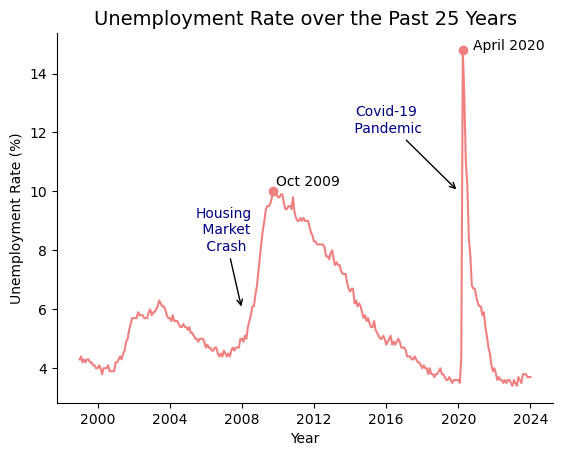

In [48]:
# Unemployment vs Years
fig, ax2 = plt.subplots()
ax2.plot(merged_df.index, merged_df['unemployment'], color='lightcoral')
ax2.scatter(pd.Timestamp('2020-04-01'),merged_df.loc['2020-04-01','unemployment'], color='lightcoral')
ax2.scatter(pd.Timestamp('2009-10-01'),merged_df.loc['2009-10-01','unemployment'], color='lightcoral')
ax2.set_xlabel('Year')
ax2.set_ylabel('Unemployment Rate (%)')
ax2.set_title('Unemployment Rate over the Past 25 Years', ha='center', fontsize=14)
ax2.annotate('April 2020', xy=(pd.Timestamp("2020-11-01"), 14.8))
ax2.annotate('Oct 2009', xy=(pd.Timestamp("2009-12-01"), 10.2))
ax2.annotate('Housing\n Market\n Crash',xy=(pd.Timestamp("2008-01-01"), 6),ha='center',
            xytext=(pd.Timestamp("2007-01-01"),8),arrowprops={'arrowstyle': '->'},color='navy')
ax2.annotate('Covid-19\n Pandemic',xy=(pd.Timestamp("2020-01-01"), 10),ha='center',
            xytext=(pd.Timestamp("2016-01-01"),12),arrowprops={'arrowstyle': '->'},color='navy')

ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
plt.show()

Unemployment seems to go up and down in waves. As I mentioned before, there was a spike in unemployment in October 2009 and a peak at 14.8% in April 2020 due to the housing market crash in 2008 and the covid-19 pandemic in 2019. 

In [78]:
# Finding the highest rate of change in CPI
monthly_data = merged_df['cpi'].resample('M').first()
four_year_change = monthly_data.pct_change(periods=12)
four_year_change.sort_values(ascending=False).head()

date
2022-06-30    0.090598
2022-05-31    0.085815
2022-03-31    0.085425
2022-07-31    0.085248
2022-08-31    0.082627
Name: cpi, dtype: float64

It looks like the highest rate of change in CPI came in 2022

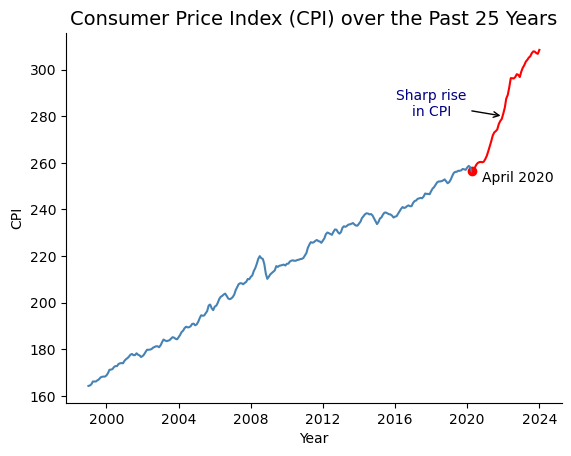

In [94]:
# CPI vs Years
fig, ax = plt.subplots()

before_april_2020 = merged_df.loc[merged_df.index <= pd.Timestamp('2020-04-01'), 'cpi']
after_april_2020 = merged_df.loc[merged_df.index > pd.Timestamp('2020-04-01'), 'cpi']

ax.plot(before_april_2020.index, before_april_2020, color='steelblue')
ax.plot(after_april_2020.index, after_april_2020, color='red')

ax.scatter(pd.Timestamp('2020-04-01'),merged_df.loc['2020-04-01','cpi'], color='red')
ax.set_xlabel("Year")
ax.set_ylabel("CPI")
ax.set_title("Consumer Price Index (CPI) over the Past 25 Years", ha='center', fontsize=14)
ax.annotate('April 2020', xy=(pd.Timestamp("2020-11-01"), 252))
ax.annotate('Sharp rise\nin CPI',xy=(pd.Timestamp("2022-01-01"), 280),ha='center',
            xytext=(pd.Timestamp("2018-01-01"),280),arrowprops={'arrowstyle': '->'},color='navy')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

The CPI has continuously increased over the past 25 years. If we look at the period when unemployment peaked in April 2020, it appears that the rate of change in the CPI drastically increased after April.

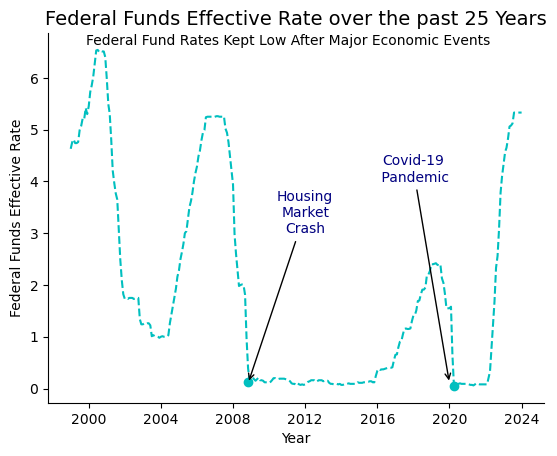

In [116]:
# FRED vs Years
fig, ax3 = plt.subplots()
ax3.plot(merged_df.index, merged_df['FRED'], color='c',linestyle='--')
ax3.scatter(pd.Timestamp('2020-04-01'),merged_df.loc['2020-04-01','FRED'], color='c')
ax3.scatter(pd.Timestamp('2008-11-01'),merged_df.loc['2009-10-01','FRED'], color='c')
ax3.set_xlabel('Year')
ax3.set_ylabel('Federal Funds Effective Rate')
ax3.set_title('Federal Funds Effective Rate over the past 25 Years',fontsize=14)
ax3.annotate('Housing\nMarket\nCrash',xy=(pd.Timestamp("2008-11-01"), 0.10),ha='center',
            xytext=(pd.Timestamp("2012-01-01"),3),arrowprops={'arrowstyle': '->'},color='navy')
ax3.annotate('Covid-19\n Pandemic',xy=(pd.Timestamp("2020-01-01"), .1),ha='center',
            xytext=(pd.Timestamp("2018-01-01"),4),arrowprops={'arrowstyle': '->'},color='navy')
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
fig.text(0.5, 0.85, 'Federal Fund Rates Kept Low After Major Economic Events', ha='center', va='bottom', fontsize=10)
plt.show()

There does not seem to be an obvious pattern with the federal funds rate over past 25 years. It has peaks and valleys like the graph of the unemployment rate.

During the times of high unemployment, the federal funds rate was very low at less than 1%.

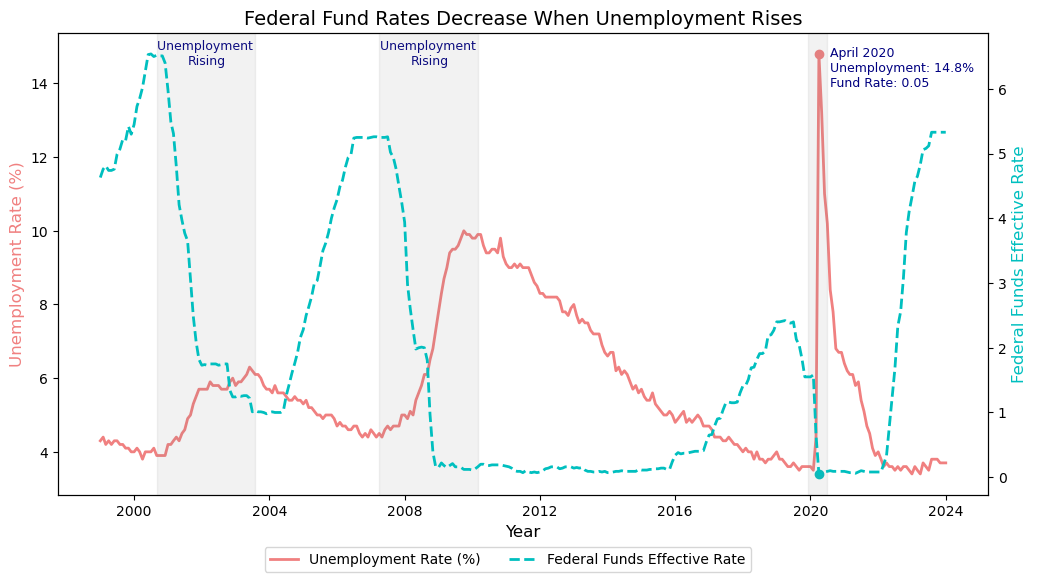

In [18]:
# Overlapping the unemployment and federal funds rate
fig, ax2 = plt.subplots(figsize=(12,6))
ax2.plot(merged_df.index, merged_df['unemployment'], color='lightcoral', label='Unemployment Rate (%)',linewidth=2)
ax2.scatter(pd.Timestamp('2020-04-01'),merged_df.loc['2020-04-01','unemployment'], color='lightcoral')
ax2.set_xlabel('Year', size=12)
ax2.set_ylabel('Unemployment Rate (%)', color='lightcoral',size=12)
ax2.set_title('Federal Fund Rates Decrease When Unemployment Rises', size=14)
ax2.annotate('April 2020\nUnemployment: 14.8%\nFund Rate: 0.05', xy=(pd.Timestamp("2020-08-01"), 13.9), fontsize=9, color='navy')

ax3 = ax2.twinx()
ax3.plot(merged_df.index, merged_df['FRED'], color='c',  label='Federal Funds Effective Rate', linestyle='--',linewidth=2)
ax3.scatter(pd.Timestamp('2020-04-01'),merged_df.loc['2020-04-01','FRED'], color='c')

ax3.set_ylabel('Federal Funds Effective Rate', color='c',size=12)
ax3.grid(False)

ax2.annotate('Unemployment \nRising', xy=(pd.Timestamp("2008-10-01"), 14.5), fontsize=9, color='navy', ha = 'center')
ax2.annotate('Unemployment \nRising', xy=(pd.Timestamp("2002-03-01"), 14.5), fontsize=9, color='navy', ha = 'center')

plt.axvspan('2019-12', '2020-07', color='gray', alpha=0.1)
plt.axvspan('2007-04', '2010-03', color='gray', alpha=0.1)
plt.axvspan('2000-09', '2003-08', color='gray', alpha=0.1)

fig.legend(loc="lower center",bbox_to_anchor=(0.5, -0.03),
            ncol=2)

plt.show()

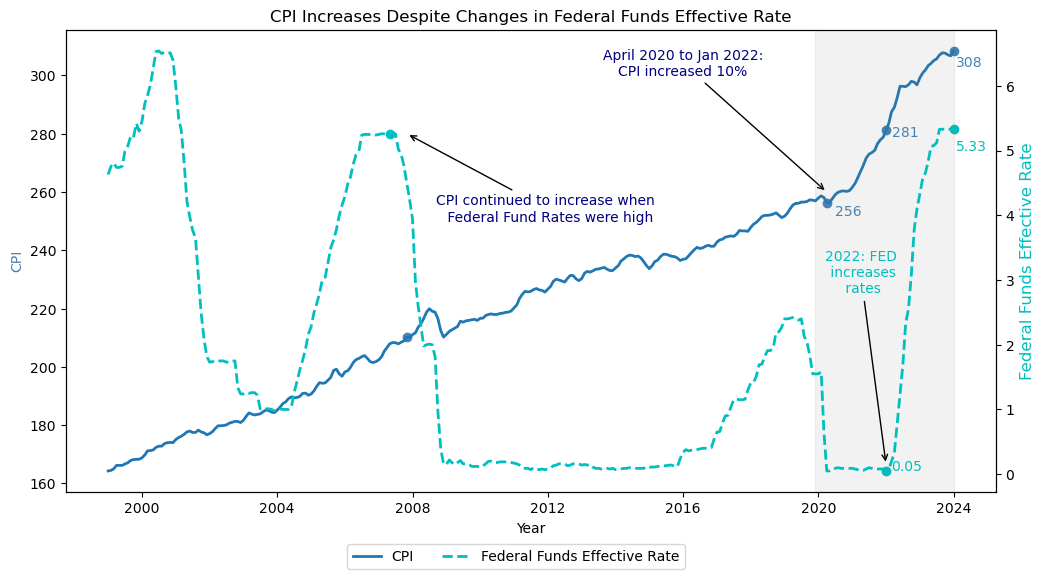

In [19]:
# Overlapping the CPI and federal funds rate
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(merged_df.index, merged_df['cpi'], label='CPI',linewidth=2)
ax.scatter(pd.Timestamp('2020-04-01'),merged_df.loc['2020-04-01','cpi'], color='steelblue')
ax.scatter(pd.Timestamp('2024-01-01'),merged_df.loc['2024-01-01','cpi'], color='steelblue')
ax.scatter(pd.Timestamp('2007-11-01'),merged_df.loc['2007-11-01','cpi'], color='steelblue')
ax.scatter(pd.Timestamp('2022-01-01'),merged_df.loc['2022-01-01','cpi'], color='steelblue')
ax.set_xlabel("Year")
ax.set_ylabel("CPI", color='steelblue')
ax.set_title('CPI Increases Despite Changes in Federal Funds Effective Rate')
ax.annotate('256', xy=(pd.Timestamp("2020-07-01"), 252,), color='steelblue')
ax.annotate('308', xy=(pd.Timestamp("2024-01-25"), 303), color='steelblue')
ax.annotate('281', xy=(pd.Timestamp("2022-03-01"), 279), color='steelblue')
ax.annotate('April 2020 to Jan 2022:\nCPI increased 10%', xy=(pd.Timestamp("2020-04-01"), 260),ha='center',
            xytext=(pd.Timestamp("2016-01-01"),300),arrowprops={'arrowstyle': '->'},color='navy')
ax.annotate('CPI continued to increase when \n Federal Fund Rates were high', xy=(pd.Timestamp("2007-11-01"), 280),ha='center',
            xytext=(pd.Timestamp("2012-01-01"),250),arrowprops={'arrowstyle': '->'},color='navy')

ax3 = ax.twinx()

ax3.plot(merged_df.index, merged_df['FRED'], color='c',  label='Federal Funds Effective Rate', linestyle='--',linewidth=2)
ax3.scatter(pd.Timestamp('2022-01-01'),merged_df.loc['2020-04-01','FRED'], color='c')
ax3.scatter(pd.Timestamp('2007-05-01'),merged_df.loc['2007-05-01','FRED'], color='c')
ax3.scatter(pd.Timestamp('2024-01-01'),merged_df.loc['2024-01-01','FRED'], color='c')
ax3.set_ylabel('Federal Funds Effective Rate', color='c',size=12)
ax3.annotate('5.33', xy=(pd.Timestamp("2024-01-25"), 5),color='c')
ax3.annotate('0.05', xy=(pd.Timestamp("2022-03-01"), .05),color='c')
ax3.annotate('2022: FED\n increases\n rates', xy=(pd.Timestamp("2022-01-01"), 0.15), color='c',ha='center',
             xytext=(pd.Timestamp("2021-04-01"),2.8),arrowprops={'arrowstyle': '->'})

plt.axvspan('2019-12', '2024-01', color='gray', alpha=0.1)

fig.legend(loc="lower center",bbox_to_anchor=(0.5, -0.03), ncol=2)

plt.show()

For the most part, CPI does has been increasing at a steady rate regardless of the changes to the Federal Funds rate. However, after April 2020, there is a sharp increase in CPI followed by a sharp increase in federal funds rate in 2022. So there was a period from 2020 to 2022 where the CPI rose drastically but the FED did not take any action to increase the rate.



## Conclusion

Overall, the FED has been able to maintain low unemployemnt. During periods when the unemployment rate was rising, the FED decreased the Federal Funds Effective Rate. This lower rate can lead to companies borrowing more money to expand their business and in turn, hire more workers, reducing unemployment.

However, it is difficult to determine if the FED has been able to fulfill its mandate to control inflation. Although the Federal funds effective rate has fluctuated over the past 25 years, CPI has steadily increased over this time. There is one notable period from April 2020 to Jan 2022, where CPI increased by 10% but the federal funds rate was unchanged at 0.05. Although it might seem like the FED was not doing anything at this time, they kept the rate low due to unemployment being at 14.8%. When unemployment returned to less than <1% in Jan 2022, the FED aggresively raised rates to 5.33 by Jan 2024. Subsequently, the CPI also went up 10% during this period. Therefore, while the FED has been effective in managing unemployment, its impact on inflation is unclear.